# Imports

In [1]:
from diffusers import StableDiffusionPipeline
from utils import image_grid, plot_img
import torch

/home/shane/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Parameters

In [11]:
weights_folder_name = "shane5"
finetuned_model = "./models/shane/stable_diffusion_weights/" + weights_folder_name
no_imgs = 4
num_inference_steps = 50
guidance_scale = 30
cols = no_imgs // 2 if no_imgs // 2 <= 5 else 5
rows = no_imgs // cols if no_imgs // cols % 2 == 0 else no_imgs // cols + 1

# Model

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(finetuned_model, torch_dtype=torch.float16).to("cuda")

/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [12]:
prompt = "a photo of shane male"
n_prompt = "bad, deformed, ugly, bad anatomy, cartoon, animated, scary, wrinkles, duplicate, double"
image = [0] * no_imgs
for i in range(no_imgs):
    image[i] = pipe(prompt, negative_prompt=n_prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]

100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


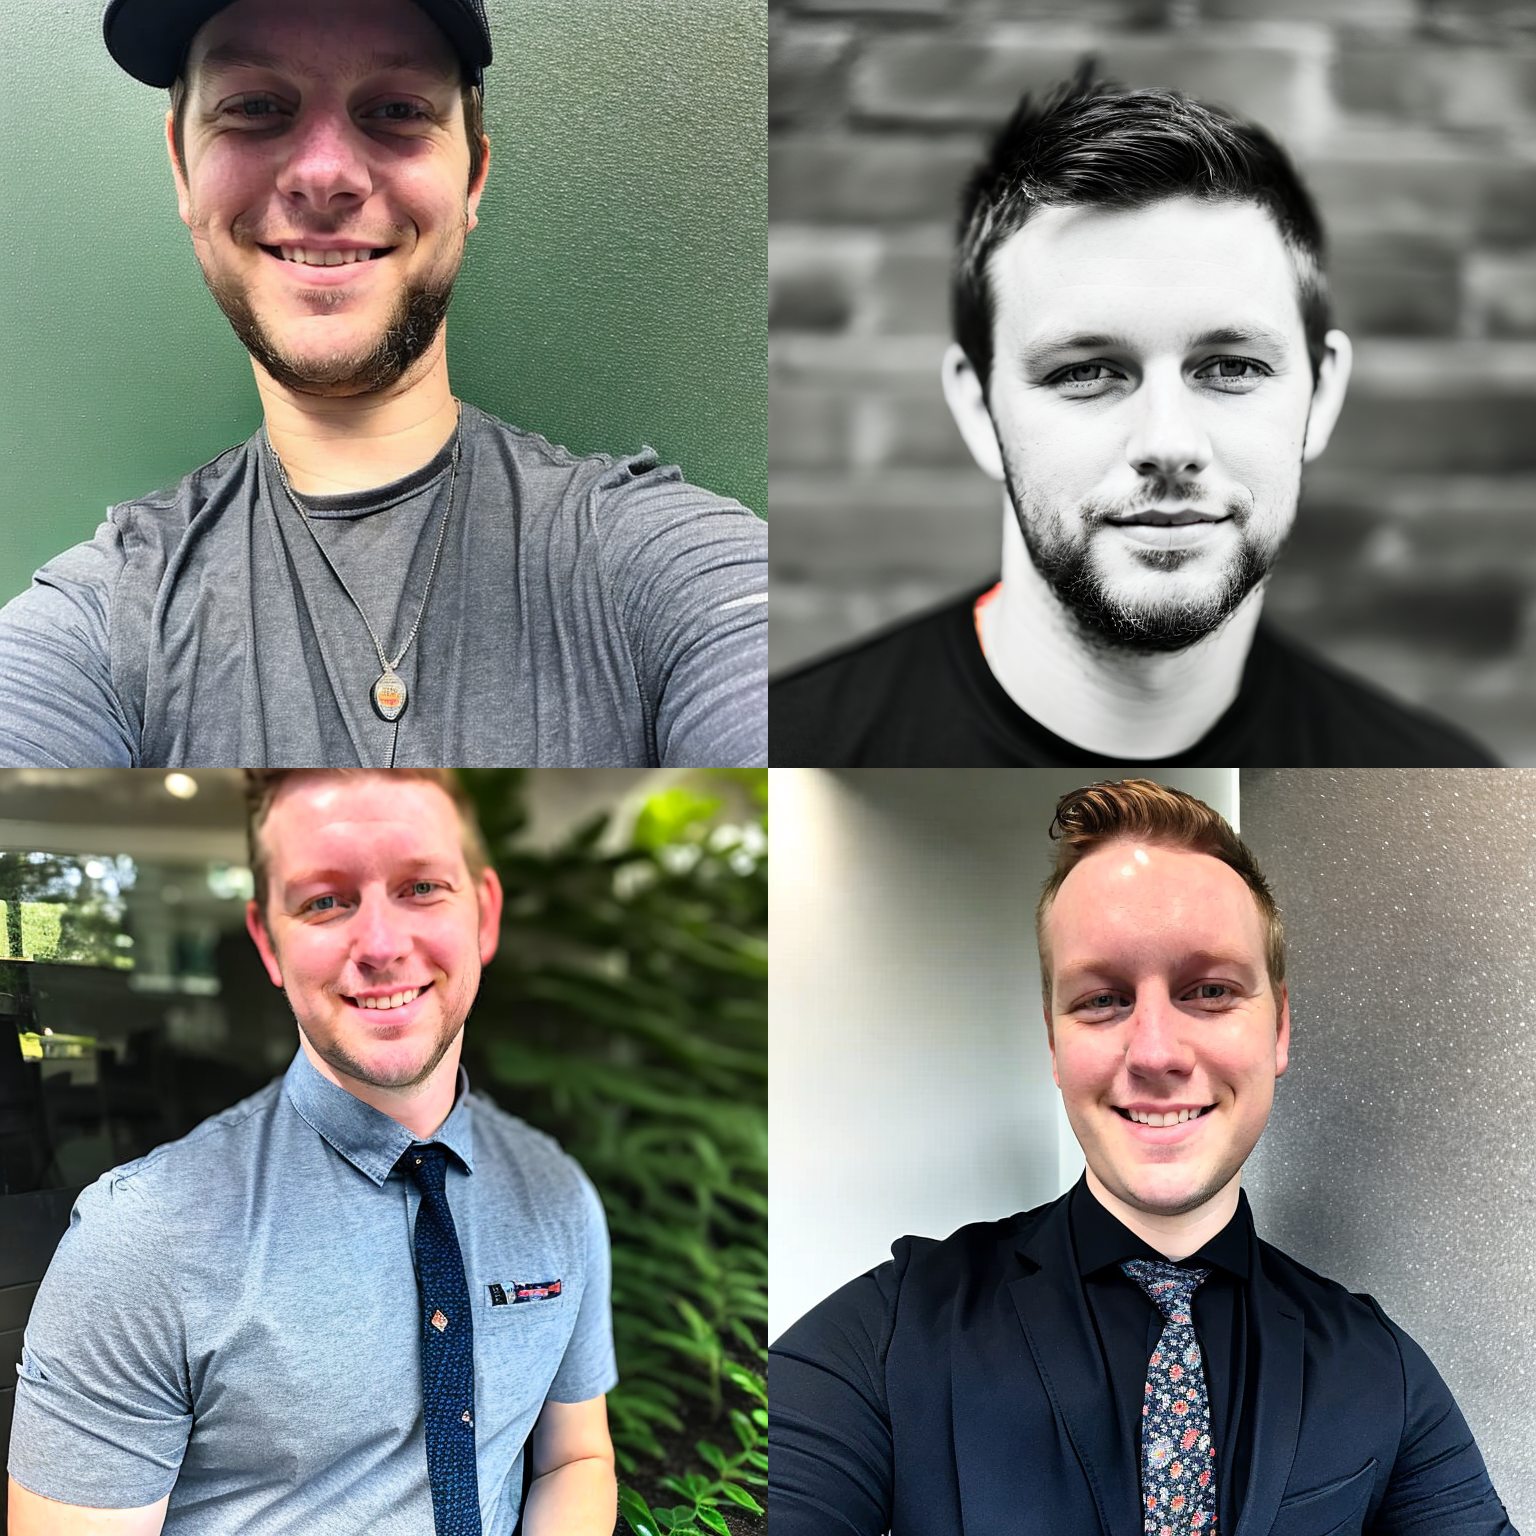

In [13]:
image_grid(image, rows=rows, cols=cols)